In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl
import sympy as sp



1. *Função de Transferência $G_{vd}(s)$*:
   - Representa a relação entre a variação na tensão de saída ($\hat{v}_o(s)$) e a variação na razão cíclica $d(s)$, mantendo a tensão de entrada $v_i(s)$ constante.
   - Fórmula:
\
   $G_{vd}(s) = \frac{V_i}{L_o C_o s^2 + \frac{L_o}{R_o} s + 1}$

   Onde $V_i$ é a tensão de entrada, $D$ é a razão cíclica, $L_o$ é a indutância, $C_o$ é a capacitância e $R_o$ é a resistência.

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


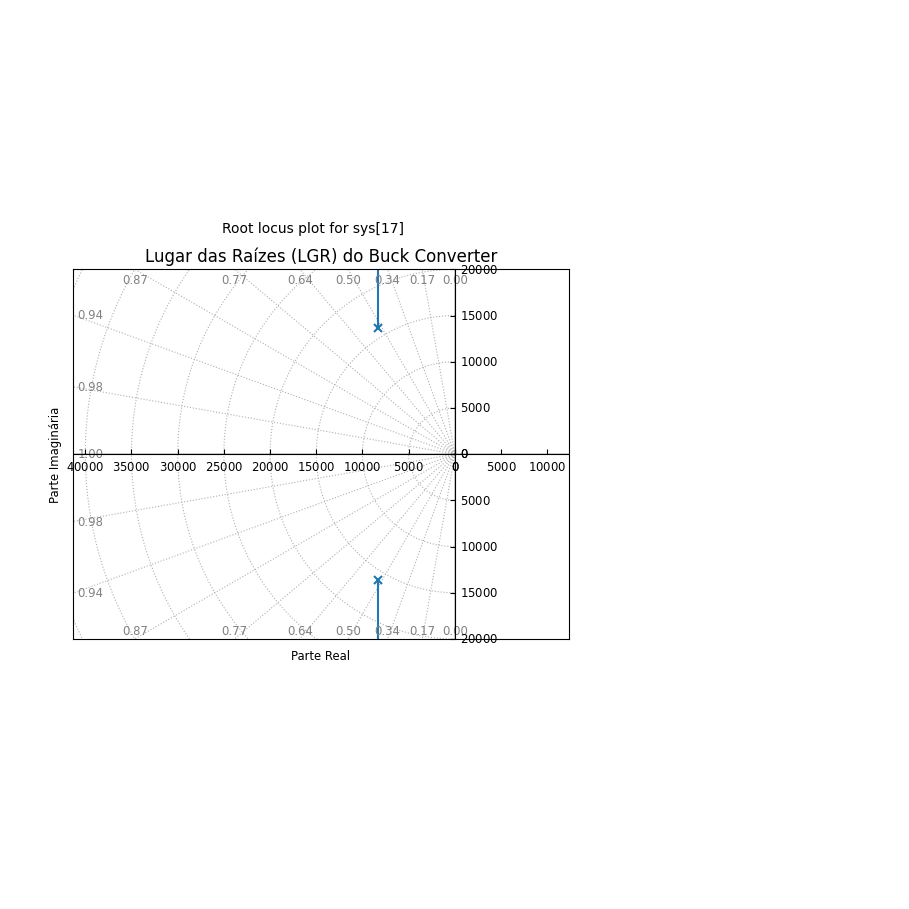

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parâmetros do seu Buck
Vin = 24                  # Tensão de entrada (V)
Vout = 12                  # Tensão de saída (V)
Iout = 2                # Corrente de saída (A)
Rload = Vout / Iout       # Carga equivalente (Ω)
L = 390e-6                # Indutor (uH)
C = 10e-6               # Capacitor de saída (uF)

# Função de transferência da planta do Buck (sem compensador)
# Gvd(s) = Vin / (L*C*s^2 + (L/R)*s + 1)
num = [Vin]
den = [L*C, L/Rload, 1]
G_plant = ctrl.TransferFunction(num, den)



# Opcional: adicionar compensador tipo 2 simples (PI com roll-off)
# C(s) = K * (1 + s/wz) / (1 + s/wp)
# Descomente e edite abaixo se quiser testar com compensador:
# wz = 2 * np.pi * 200   # zero em 200 Hz
# wp = 2 * np.pi * 5000  # pólo em 5 kHz
# K = 10
# num_c = [K / wz, K]
# den_c = [1 / wp, 1]
# C = ctrl.TransferFunction(num_c, den_c)
# G_open = G_plant * C

# Para LGR só da planta (sem compensador):
G_open = G_plant

# Gráfico do Lugar das Raízes
plt.figure()
ctrl.root_locus(G_open, grid=True)
plt.title("Lugar das Raízes (LGR) do Buck Converter")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.xlim([-30000, 1000])
plt.ylim([-20000, 20000])
plt.grid(True)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


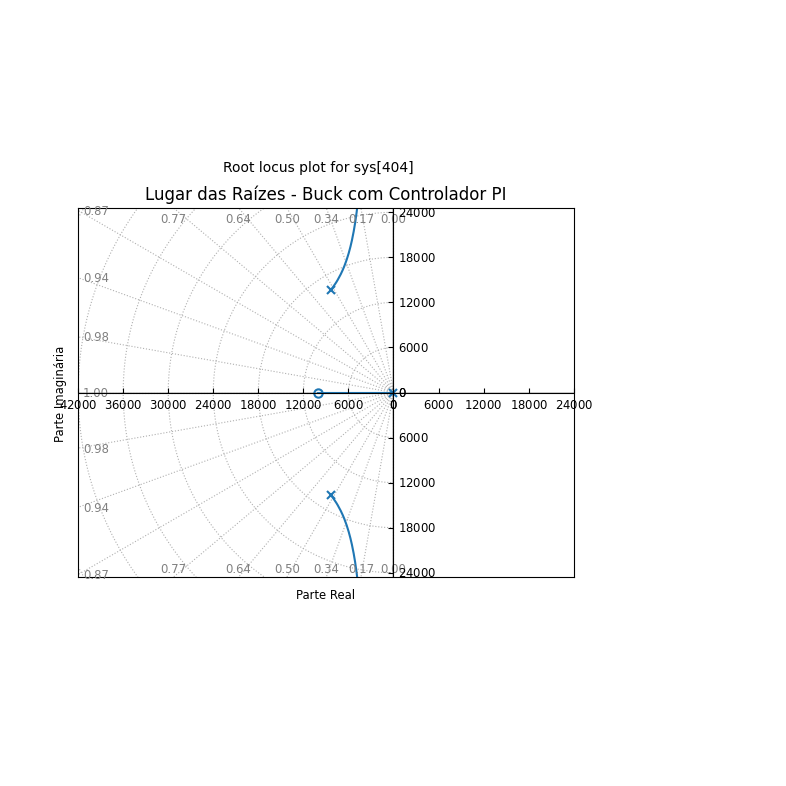

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Planta do Buck
Vin = 24
Vout = 12
Iout = 2
Rload = Vout / Iout
L = 390e-6
C = 10e-6

# Função de transferência da planta: Gvd(s)
num_plant = [Vin]
den_plant = [L * C, L / Rload, 1]
G_plant = ctrl.TransferFunction(num_plant, den_plant)

# Controlador PI: C(s) = Kp + Ki/s = (Kp*s + Ki) / s
Kp = 0.01      # Ganho proporcional
Ki = 100       # Ganho integral
num_PI = [Kp, Ki]
den_PI = [1, 0]
C_PI = ctrl.TransferFunction(num_PI, den_PI)

# Malha aberta com PI
G_open_PI = C_PI * G_plant

# LGR
plt.figure()
ctrl.root_locus(G_open_PI, grid=True)
plt.title("Lugar das Raízes - Buck com Controlador PI")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.grid(True)
plt.show()

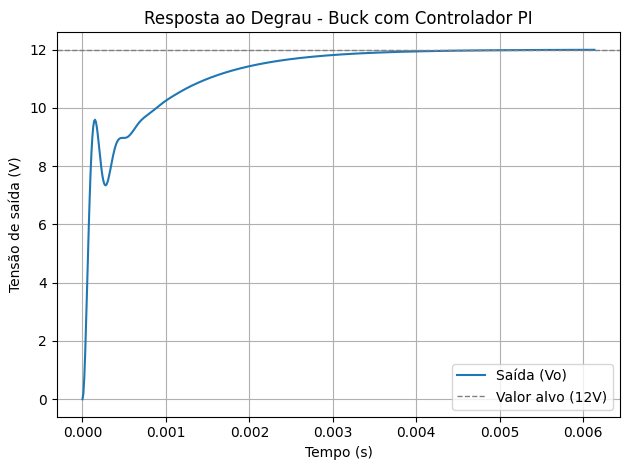

In [83]:

# Função de transferência da planta Gvd(s) = Vo(s)/Vc(s)
num_plant = [Vin]
den_plant = [L*C, L/Rload, 1]
G_plant = ctrl.TransferFunction(num_plant, den_plant)

# === Controlador PI ===
Kp = 0.05      # Ganho proporcional
Ki = 100       # Ganho integral

# PI(s) = (Kp*s + Ki)/s
num_PI = [Kp, Ki]
den_PI = [1, 0]
C_PI = ctrl.TransferFunction(num_PI, den_PI)

# === Malha aberta e malha fechada ===
G_open = C_PI * G_plant
G_closed = ctrl.feedback(G_open, 1)

# === Resposta ao degrau ===
t, y = ctrl.step_response(G_closed)

# Ajuste o valor final para representar 12 V em vez de 1 V (normalização)
y = y * Vout

# === Plot ===
plt.figure()
plt.plot(t, y, label="Saída (Vo)")
plt.axhline(Vout, color='gray', linestyle='--', linewidth=1, label="Valor alvo (12V)")
plt.title("Resposta ao Degrau - Buck com Controlador PI")
plt.xlabel("Tempo (s)")
plt.ylabel("Tensão de saída (V)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [91]:
def pi_componentes(Kp, Ki, R1_ohms):
    R2 = Kp * R1_ohms
    C1 = 1 / (Ki * R1_ohms)
    return R2, C1

# Exemplo:
Kp = 0.05
Ki = 100
R1 = 10000  # 10k

R2, C1 = pi_componentes(Kp, Ki, R1)
print(f"Para R1 = {R1/1000:.0f}kΩ, use:")
print(f"R2 = {R2:.1f} Ω")
print(f"C1 = {C1 * 1e6:.2f} µF")

Para R1 = 10kΩ, use:
R2 = 500.0 Ω
C1 = 1.00 µF
